Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-53-f91bf99bf2da>:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(image_path)


Displaying the original image.


array([[[ 31,  31,  67],
        [ 31,  31,  67],
        [ 31,  31,  67],
        ...,
        [ 30,  32,  71],
        [ 30,  32,  70],
        [ 30,  32,  70]],

       [[ 31,  31,  67],
        [ 31,  31,  67],
        [ 31,  31,  67],
        ...,
        [ 30,  32,  71],
        [ 30,  32,  71],
        [ 30,  32,  71]],

       [[ 31,  31,  67],
        [ 31,  31,  67],
        [ 31,  31,  67],
        ...,
        [ 30,  32,  71],
        [ 30,  32,  71],
        [ 30,  32,  71]],

       ...,

       [[109, 155, 108],
        [113, 168, 101],
        [102, 166,  79],
        ...,
        [226, 144,  45],
        [121,  67,   0],
        [198, 194, 103]],

       [[188, 224, 136],
        [181, 218, 123],
        [188, 225, 120],
        ...,
        [244, 161,  55],
        [132,  69,   2],
        [168, 158,  73]],

       [[175, 208, 103],
        [177, 207, 107],
        [176, 200, 102],
        ...,
        [255, 171,  62],
        [145,  78,  10],
        [145, 130,  49]]], dtype=uint8)
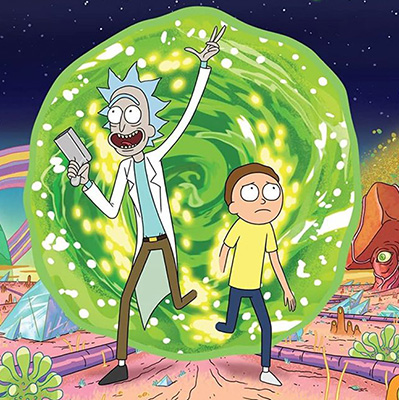

In [53]:
#Mounting google drive with googl colab
!pip install imageio
from google.colab import drive
drive.mount('/content/drive')

#importing libraries necessary to handle the imported image properly
import imageio
from IPython.display import display
import numpy as np

def load_image(image_path):
    img = imageio.imread(image_path)
    return img

# Load the image
image_path = '/content/drive/MyDrive/Spring 2024/Linear algebra/Final Project/rick_morty.jpg'
img = load_image(image_path)
print("Displaying the original image.")
display(img)


In [54]:
#Function for different features

#Crop
def crop_image(image, start_row, start_col, end_row, end_col):
    return image[start_row:end_row, start_col:end_col]

#Resize
def resize_image(image, new_height, new_width):
    height_ratio = len(image) / new_height
    width_ratio = len(image[0]) / new_width
    resized_image = np.zeros((new_height, new_width, image.shape[2]), dtype=image.dtype)

    for i in range(new_height):
        for j in range(new_width):
            resized_image[i, j] = image[int(i * height_ratio), int(j * width_ratio)]
    return resized_image

#Rotate
def rotate_image(image, angle):
    if angle == 90:
        return np.rot90(image)
    elif angle == 180:
        return np.rot90(image, 2)
    elif angle == 270:
        return np.rot90(image, 3)
    return image


Cropped out Rick!!


array([[[137, 195,  49],
        [124, 175,  46],
        [124, 164,  67],
        ...,
        [ 85, 154,  61],
        [ 80, 149,  58],
        [ 78, 151,  61]],

       [[149, 207,  71],
        [130, 177,  65],
        [185, 212, 141],
        ...,
        [ 82, 153,  61],
        [ 83, 150,  55],
        [ 95, 162,  65]],

       [[132, 193,  66],
        [133, 180,  74],
        [179, 206, 139],
        ...,
        [ 90, 160,  74],
        [100, 164,  70],
        [118, 180,  73]],

       ...,

       [[252, 244, 241],
        [ 68,  63,  59],
        [ 32,  28,  25],
        ...,
        [ 62, 133,  53],
        [ 60, 131,  53],
        [ 63, 136,  55]],

       [[255, 253, 250],
        [163, 158, 154],
        [ 14,  10,   7],
        ...,
        [ 66, 139,  50],
        [ 70, 142,  56],
        [ 86, 159,  70]],

       [[116, 108, 105],
        [131, 126, 122],
        [ 56,  51,  48],
        ...,
        [ 93, 164,  68],
        [103, 176,  84],
        [114, 189,  96]]], dtype=uint8)
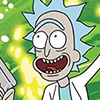

In [61]:
# Apply the crop function
#Use specific row and col number as arguments to get specific starting and ending pixel

#Here specific number were used to crop out rick
start_row = 75
start_col = 75
end_row = 175
end_col = 175

cropped_img = crop_image(img, start_row, start_col, end_row, end_col)
print("Cropped out Rick!!")
display(cropped_img)




array([[[ 31,  31,  67],
        [ 31,  31,  67],
        [ 31,  31,  67],
        ...,
        [ 30,  32,  71],
        [ 30,  32,  71],
        [ 30,  32,  70]],

       [[ 31,  31,  67],
        [ 31,  31,  67],
        [ 31,  31,  67],
        ...,
        [ 30,  32,  71],
        [ 30,  32,  71],
        [ 30,  32,  71]],

       [[ 31,  31,  67],
        [ 31,  31,  67],
        [ 31,  31,  67],
        ...,
        [ 31,  33,  72],
        [ 30,  32,  71],
        [ 29,  31,  72]],

       ...,

       [[ 75,  90, 159],
        [ 78,  96, 168],
        [ 58,  82, 130],
        ...,
        [247, 157,  45],
        [255, 176,  72],
        [134,  98,  20]],

       [[ 41,  82,  86],
        [ 77, 129, 116],
        [ 89, 163, 100],
        ...,
        [251, 160,  46],
        [248, 167,  62],
        [117,  70,   0]],

       [[188, 224, 136],
        [181, 218, 123],
        [199, 228, 118],
        ...,
        [247, 152,  42],
        [249, 169,  56],
        [132,  69,   2]]], dtype=uint8)
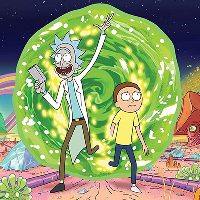

In [64]:
# Apply the resize function
#Use specific number as arguments to get the preferred new height and width

#Here new height and width were used as 200
height = 200
width = 200

resized_img = resize_image(img, height, width)
display(resized_img)

array([[[145, 130,  49],
        [145,  78,  10],
        [255, 171,  62],
        ...,
        [176, 200, 102],
        [177, 207, 107],
        [175, 208, 103]],

       [[168, 158,  73],
        [132,  69,   2],
        [244, 161,  55],
        ...,
        [188, 225, 120],
        [181, 218, 123],
        [188, 224, 136]],

       [[198, 194, 103],
        [121,  67,   0],
        [226, 144,  45],
        ...,
        [102, 166,  79],
        [113, 168, 101],
        [109, 155, 108]],

       ...,

       [[ 30,  32,  71],
        [ 30,  32,  71],
        [ 30,  32,  71],
        ...,
        [ 31,  31,  67],
        [ 31,  31,  67],
        [ 31,  31,  67]],

       [[ 30,  32,  71],
        [ 30,  32,  71],
        [ 30,  32,  71],
        ...,
        [ 31,  31,  67],
        [ 31,  31,  67],
        [ 31,  31,  67]],

       [[ 30,  32,  70],
        [ 30,  32,  70],
        [ 30,  32,  71],
        ...,
        [ 31,  31,  67],
        [ 31,  31,  67],
        [ 31,  31,  67]]], dtype=uint8)
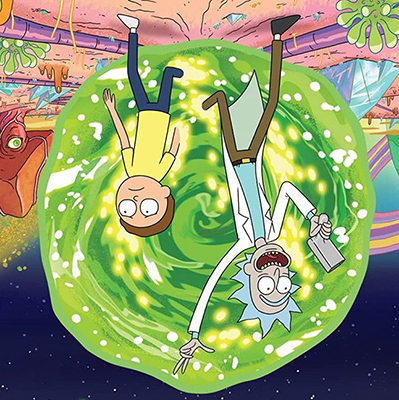

In [65]:
# Apply the rotate function
#Use (90,180,270,360...) as parameter to rotate the image in that angle

#here 180 was used as the desired angle
angle = 180

rotated_img = rotate_image(img, angle)
display(rotated_img)